In [1]:
# Simple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
training = pd.read_csv('TRAINING.csv',index_col='Week Start Date',parse_dates=True)
testing = pd.read_csv('FEATURE.csv',index_col='Week Start Date',parse_dates=True)

In [3]:
training.head()

Year  Week  Total_Case  Min Temperature  Average Temperature  \
Week Start Date                                                                 
2010-01-01       2010     1         400             25.8            27.557143   
2010-01-08       2010     2         468             24.8            26.971429   
2010-01-15       2010     3         502             25.0            27.857143   
2010-01-22       2010     4         525             24.9            27.557143   
2010-01-29       2010     5         461             25.7            27.971429   

                 Average Precipitation  Wind Speed  Wind Direction  \
Week Start Date                                                      
2010-01-01                   13.714286   15.857143      160.430000   
2010-01-08                    7.071429   14.642857      143.447143   
2010-01-15                    0.500000   12.771429      167.755714   
2010-01-22                    7.642857   14.328571      172.632857   
2010-01-29                    8.057143   16.628571      168.964286   

                 Visibility  Cloud Cover  Average Relative Humidity  
Week Start Date                                                      
2010-01-01         8.571429    89.842857                  81.438571  
2010-01-08         8.642857    89.642857                  79.838571  
2010-01-15         8.785714    89.328571                  79.298571  
2010-01-22         8.485714    89.314286                  81.282857  
2010-01-29         8.300000    89.514286                  80.688571

In [4]:
testing.head()

Year  Week  Total_Case  Min Temperature  Average Temperature  \
Week Start Date                                                                 
2016-05-13       2016    20         700             27.0            28.628571   
2016-05-20       2016    21         645             27.0            29.228571   
2016-05-27       2016    22         717             27.9            29.285714   
2016-06-03       2016    23         872             26.9            29.100000   
2016-06-10       2016    24         941             26.0            28.685714   

                 Average Precipitation  Wind Speed  Wind Direction  \
Week Start Date                                                      
2016-05-13                   10.141429   15.957143      187.994286   
2016-05-20                    5.514286   14.714286      176.244286   
2016-05-27                    3.171429   16.471429      167.554286   
2016-06-03                    3.571429   17.185714      189.732857   
2016-06-10                   13.360000   16.457143      191.520000   

                 Visibility  Cloud Cover  Average Relative Humidity  
Week Start Date                                                      
2016-05-13         8.814286    89.857143                  82.578571  
2016-05-20         9.071429    89.457143                  79.518571  
2016-05-27         9.485714    89.200000                  76.891429  
2016-06-03         9.014286    89.214286                  77.364286  
2016-06-10         9.071429    89.228571                  80.645714

In [5]:
training.tail()

Year  Week  Total_Case  Min Temperature  Average Temperature  \
Week Start Date                                                                 
2016-04-08       2016    15        1137             28.0            30.357143   
2016-04-15       2016    16         929             28.0            30.314286   
2016-04-22       2016    17         892             27.0            28.900000   
2016-04-29       2016    18         781             26.0            28.414286   
2016-05-06       2016    19         732             26.0            28.400000   

                 Average Precipitation  Wind Speed  Wind Direction  \
Week Start Date                                                      
2016-04-08                    3.885714   19.442857      238.380000   
2016-04-15                    0.800000   16.714286      198.620000   
2016-04-22                   18.034286   15.742857      157.392857   
2016-04-29                   14.982857   18.557143      140.352857   
2016-05-06                   20.642857   15.557143      151.632857   

                 Visibility  Cloud Cover  Average Relative Humidity  
Week Start Date                                                      
2016-04-08         7.728571    89.042857                  74.952857  
2016-04-15         8.157143    89.128571                  73.927143  
2016-04-22         5.142857    88.500000                  81.582857  
2016-04-29         6.371429    89.942857                  83.672857  
2016-05-06         7.871429    90.300000                  83.707143

In [6]:
testing.tail()

Year  Week  Total_Case  Min Temperature  Average Temperature  \
Week Start Date                                                                 
2017-11-26       2017    48         418             25.0            26.728571   
2017-12-03       2017    49         466             27.0            28.685714   
2017-12-10       2017    50         459             25.8            27.800000   
2017-12-17       2017    51         541             25.0            27.428571   
2017-12-24       2017    52         553             25.0            27.371429   

                 Average Precipitation  Wind Speed  Wind Direction  \
Week Start Date                                                      
2017-11-26                   11.582857   15.071429      202.425714   
2017-12-03                    4.977143   15.357143      139.067143   
2017-12-10                    6.142857   16.428571      141.468571   
2017-12-17                    1.700000   14.471429      136.588571   
2017-12-24                    5.145714   14.814286      166.502857   

                 Visibility  Cloud Cover  Average Relative Humidity  
Week Start Date                                                      
2017-11-26         9.085714    59.014286                  86.090000  
2017-12-03         9.800000    59.771429                  78.900000  
2017-12-10         8.771429    58.700000                  81.710000  
2017-12-17         9.385714    58.928571                  78.465714  
2017-12-24         9.114286    58.714286                  80.297143

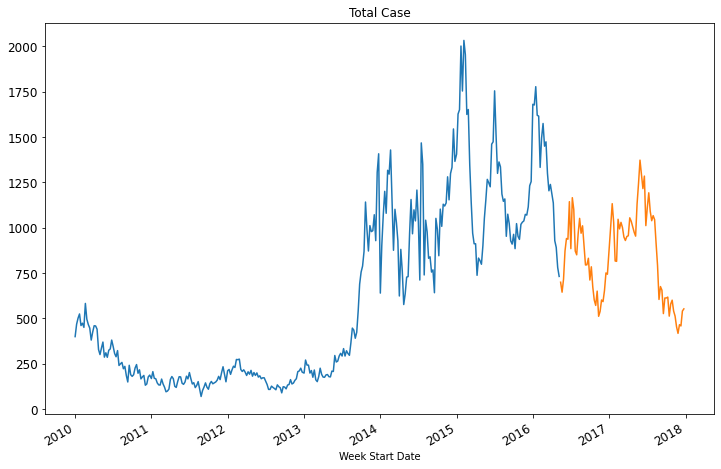

In [7]:
training.Total_Case.plot(figsize=(12,8), title= 'Total Case', fontsize=12)
testing.Total_Case.plot(figsize=(12,8), title= 'Total Case', fontsize=12)
plt.show()

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


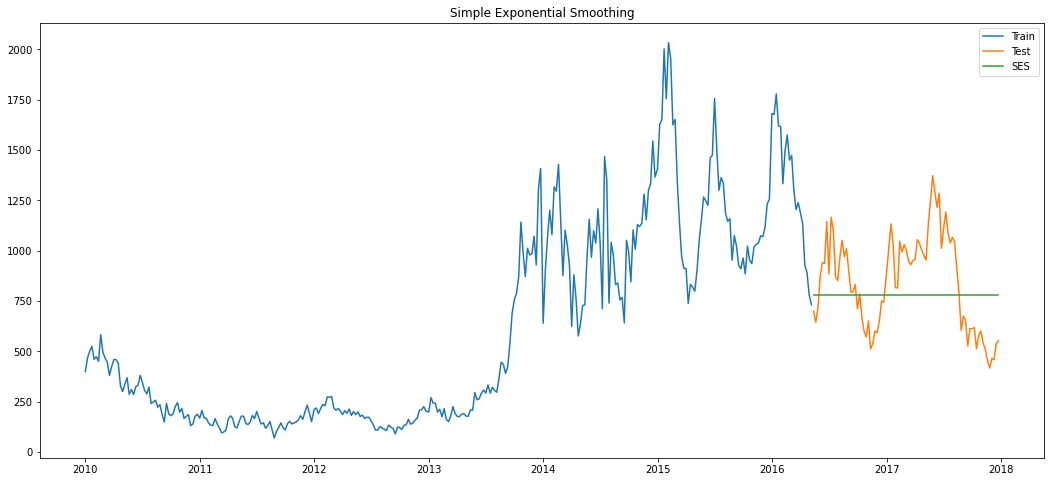

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
y_hat_avg = testing.copy()
fit2 = SimpleExpSmoothing(np.asarray(training['Total_Case'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(testing))
plt.figure(figsize=(18,8))
plt.plot(training['Total_Case'], label='Train')
plt.plot(testing['Total_Case'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(testing.Total_Case, y_hat_avg.SES))
print(rms)

243.90173853417286


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

AttributeError: 'float' object has no attribute 'rms'